In [ ]:
# grading: 5/5 excellent work!
### HW 2
### CSE 599 
### Kathryn Cogert

In [ ]:
# Step 1) Import required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn
from pandas.tools.plotting import scatter_matrix
seaborn.set()
seaborn.set_color_codes()

C:\Users\Kathryn\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Step 2) Import data, and take a first look at it to make sure everything 
# looks as I expect it to.

In [3]:
weatherdata=pd.read_csv('~/Documents/Coursework/CHEME599/HW/Cogert/data/weather_data.csv')

In [4]:
weatherdata.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT01,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121001,0,0,0,233,89,30,40,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121002,0,0,0,178,100,41,10,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121003,0,0,0,189,78,73,10,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121004,0,0,0,189,83,65,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20121005,0,0,0,217,89,57,360,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [5]:
# Step 3) Re-read the CSV file, specifying that pandas should parse these dates.
# Step 4) Now that we have this data loaded and the dates parsed, 
# we would like to set the index of the dataframe to be the date 
# rather than the line number in the file. Set the index of your 
# dataframe to the date.

In [6]:
weatherdata=pd.read_csv('~/Documents/Coursework/CHEME599/HW/Cogert/data/weather_data.csv',index_col=2,parse_dates=True)

In [7]:
# Step 3.5) Documentation indicates that percipitation and temperature are 
# Recorded in tenths of mm and deg C respectively so I'm going to divide both by 10

In [8]:
weatherdata['PRCP']=weatherdata['PRCP']/10
weatherdata['TMAX']=weatherdata['TMAX']/10
weatherdata['TMIN']=weatherdata['TMIN']/10
weatherdata['AWND']=weatherdata['AWND']/10
weatherdata.head()


,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT01,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,23.3,8.9,3.0,40,30,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,17.8,10.0,4.1,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,18.9,7.8,7.3,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,18.9,8.3,6.5,20,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,21.7,8.9,5.7,360,360,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [9]:
# Step 5) Create plots showing the temperature and precipitation as a function 
# of date (because the date is the index, this should be a very easy plot() 
# command!)

In [10]:
%matplotlib inline

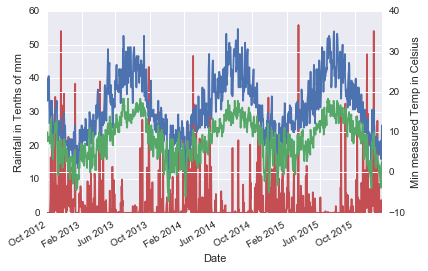

In [11]:
fig, ax1 = plt.subplots() #Initialize plots

ax2 = ax1.twinx()
ax1.plot(weatherdata.index, weatherdata['PRCP'], '-r') # Percipitation plot
ax2.plot(weatherdata.index, weatherdata['TMAX']) # Tmax
ax2.plot(weatherdata.index, weatherdata['TMIN']) # Tmin

ax1.set_xlabel('Date') #Label axis
ax1.set_ylabel('Rainfall in Tenths of mm')
ax2.set_ylabel('Min measured Temp in Celsius')
fig.autofmt_xdate() # Makes sure the dates on x axis don't overlap

plt.show()
# I realize the above is more complex than the recommended 1-2 lines of code 
# suggested for each homework step.  However, I decided to go this route because 
# I felt it was important to use a secondary axis for rainfall and to label my 
#axis properly, and this is the most efficient code I could find to do this.

In [12]:
# Step 6)   2. This data is reported hourly, but we would prefer daily totals. 
# Find the pandas operation which lets you resample the time series resulting 
# in a daily sum.

In [13]:
bikedata=pd.read_csv('~/Documents/Coursework/CHEME599/HW/Cogert/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',index_col=0,parse_dates=True)
# Also going to add a sum column.
bikedata['Total Travel']=bikedata['Fremont Bridge East Sidewalk']+bikedata['Fremont Bridge West Sidewalk']

In [14]:
bikedata=bikedata.resample('D', how='sum')

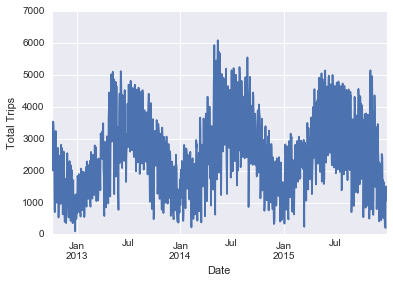

In [83]:
# Focusing on total travel for simplicity
fig2=bikedata['Total Travel'].plot()
fig2.set_ylabel('Total Trips')

In [16]:
# Step 7) Look up how to use the pandas join() command, and use it to join 
# the resampled bicycle counts and weather data into a single dataframe, 
# indexed by the date.

In [94]:
alldata=bikedata.join(weatherdata)
alldata.columns

Index(['Fremont Bridge West Sidewalk', 'Fremont Bridge East Sidewalk',
       'Total Travel', 'STATION', 'STATION_NAME', 'PRCP', 'SNWD', 'SNOW',
       'TMAX', 'TMIN', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT14', 'WT01',
       'WT05', 'WT02', 'WT22', 'WT04', 'WT13', 'WT16', 'WT08', 'WT18', 'WT03'],
      dtype='object')

In [95]:
#Converting the weather type indicators to booleans for convenience.
alldata['WT14']=alldata['WT14']!=-9999
alldata['WT01']=alldata['WT01']!=-9999
alldata['WT05']=alldata['WT05']!=-9999
alldata['WT02']=alldata['WT02']!=-9999
alldata['WT22']=alldata['WT22']!=-9999
alldata['WT04']=alldata['WT04']!=-9999
alldata['WT13']=alldata['WT13']!=-9999
alldata['WT16']=alldata['WT16']!=-9999
alldata['WT08']=alldata['WT08']!=-9999
alldata['WT18']=alldata['WT18']!=-9999
alldata['WT03']=alldata['WT03']!=-9999
alldata.head(20)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk,Total Travel,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,...,WT01,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-03,1760,1761,3521,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,18.9,7.8,...,False,False,False,False,False,False,False,False,False,False
2012-10-04,1708,1767,3475,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,18.9,8.3,...,False,False,False,False,False,False,False,False,False,False
2012-10-05,1558,1590,3148,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,21.7,8.9,...,False,False,False,False,False,False,False,False,False,False
2012-10-06,1080,926,2006,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,23.9,7.8,...,False,False,False,False,False,False,False,False,False,False
2012-10-07,1191,951,2142,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,23.9,7.8,...,False,False,False,False,False,False,False,False,False,False
2012-10-08,1829,1708,3537,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,21.1,7.8,...,False,False,False,False,False,False,False,False,False,False
2012-10-09,1759,1742,3501,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,16.1,8.9,...,False,False,False,False,False,True,False,False,False,False
2012-10-10,1648,1587,3235,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,12.2,8.3,...,False,False,True,False,False,True,False,True,False,False
2012-10-11,1579,1468,3047,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0,0,13.9,7.2,...,True,False,False,False,False,True,False,True,False,False


In [18]:
# Step 8) Create scatter plots of the number of rides as a function of 
# temperature, precipitation, wind speed, or other quantities you think might 
# be interesting (you'll probably have to look at the data documentation link 
# above to learn what the column names mean). Can you find any interesting 
# patterns? Are there trends that reflect how weather influences the number of 
# riders

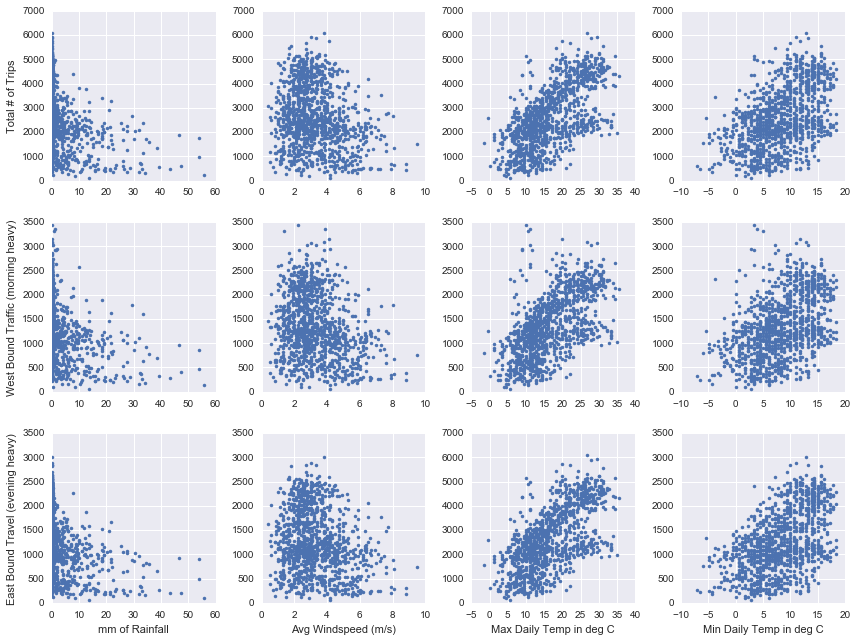

In [26]:
f, axarr = plt.subplots(3,4, figsize=(12,9))
## Plot Total Trips Against Windspeed, precipitation and temps
axarr[0,0].plot(alldata['PRCP'], alldata['Total Travel'],'.')
axarr[0,0].set_ylabel('Total # of Trips')
axarr[0,1].plot(alldata['AWND'],alldata['Total Travel'],'.')
axarr[0,2].plot(alldata['TMAX'],alldata['Total Travel'],'.')
axarr[0,3].plot(alldata['TMIN'],alldata['Total Travel'],'.')
# Plot West Bound trips as function of the above variables
axarr[1,0].plot(alldata['PRCP'], alldata['Fremont Bridge West Sidewalk'],'.')
axarr[1,0].set_ylabel('West Bound Traffic (morning heavy)')
axarr[1,1].plot(alldata['AWND'],alldata['Fremont Bridge West Sidewalk'],'.')
axarr[1,2].plot(alldata['TMAX'],alldata['Fremont Bridge West Sidewalk'],'.')
axarr[1,3].plot(alldata['TMIN'],alldata['Fremont Bridge West Sidewalk'],'.')
# Plot east bound trips as a func of above
axarr[2,0].plot(alldata['PRCP'], alldata['Fremont Bridge East Sidewalk'],'.')
axarr[2,0].set_xlabel('mm of Rainfall')
axarr[2,0].set_ylabel('East Bound Travel (evening heavy)')
axarr[2,1].plot(alldata['AWND'], alldata['Fremont Bridge East Sidewalk'],'.')
axarr[2,1].set_xlabel('Avg Windspeed (m/s)')
axarr[2,2].plot(alldata['TMAX'], alldata['Total Travel'],'.')
axarr[2,2].set_xlabel('Max Daily Temp in deg C')
axarr[2,3].plot(alldata['TMIN'],alldata['Fremont Bridge East Sidewalk'],'.')
axarr[2,3].set_xlabel('Min Daily Temp in deg C')
plt.tight_layout()

The most interesting thing to me about this data is that once the daily temps
 exceed some minimum amount, the data seems to branch off into two different
 correlations.  I suspect that the difference between these two correlations
 is whether is is raining or not.  I would like to test that theory. It looks 
 Like the effect is more pronounced when looking at max temps, so I'll focus
 on that.

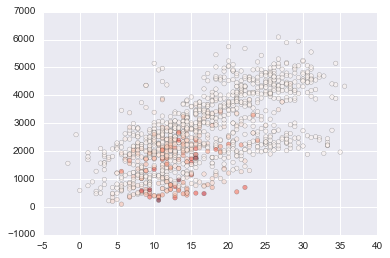

In [96]:
markercolor=(alldata['PRCP'])
fig6, axx=plt.subplots()
axx.scatter(alldata['TMAX'],alldata['Total Travel'],c=markercolor, cmap=plt.cm.Reds,alpha=0.5)
# More percipitation=darker marker color

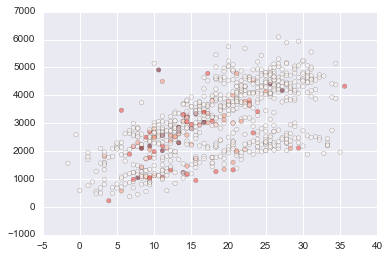

In [109]:
# Doesn't look related to rainfall yet 
# What if I Focus on very light rain fall days?
x_filt=alldata['TMAX'][alldata['PRCP']<1]
y_filt=alldata['Total Travel'][alldata['PRCP']<1]
c_filt=alldata['PRCP'][alldata['PRCP']<1]
fig7, axx=plt.subplots()
axx.scatter(x_filt,y_filt,c=c_filt, cmap=plt.cm.Reds,alpha=0.5)

It almost looks like there is a weak corrlation indicating the opposite of my theory.  The more rainfall, the more trips there are across the bridge.  It's a pretty weak correlation, so I'm not comfortable drawing any conclusions for now.   Maybe the difference is seasonal?

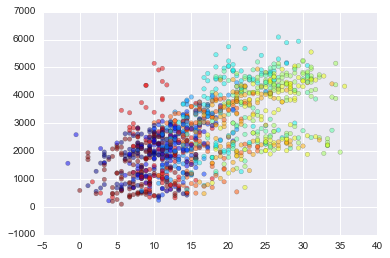

In [143]:
markercolor=(alldata.index.month)
fig6, axx=plt.subplots()
axx.scatter(alldata['TMAX'],alldata['Total Travel'],c=markercolor, cmap=plt.cm.jet,alpha=0.5)
#Blue=Jan, Darkred=Dec

Again there looks like there might be a weak correlation, but it's hard to draw any specific conclusions. The logical correlation we see reflected here is that it's much colder in Jan/Dec/Nov then it is in April/May/Jun.  It looks like this two finger correlation takes place exclusively in the spring.  My theory is that  in spring there are two groups of people: Those who decide to start biking to work no matter the weather, and those who only bike in the spring if it's really nice out.  The bottom finger shows our "diehard biking population", where as the top finger shows the sum of that very devoted population plus the fairweather bikers.  It would be great to look at cloudiness data and see if that is the differentiator here.  That's where I would take this in future.  